In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
house_data = pd.read_csv('houseprice_data.csv')#Reading in the dataset

In [3]:
house_data.corr()#To find the correlation between rows in the dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [4]:
house_data.head() #Viewing the first Five rows to see what the dataset entails

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data.info() #Checking all columns to see numbers of rows, data type and Null values before feature selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
#Using Linear Regression-------------------------------------------------------------------------------------

In [6]:
#Dependent variable used to train model
X = house_data.iloc[:,[3]].values

In [7]:
#Target variable which will be used be our model for prediction
y = house_data['price']

Text(0, 0.5, 'Price of House(In millions)')

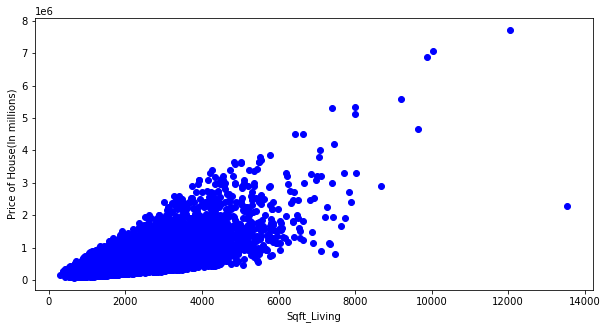

In [8]:
#Visualisation of initial dataset before Regression takes place
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 5)
ax1.scatter(X,y,color='blue')
ax1.set_xlabel('Sqft_Living')
ax1.set_ylabel('Price of House(In millions)')

In [9]:
#Splitting of Data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [10]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [11]:
#Coefficent
print('The Coefficients :',regr.coef_)
#intercept
print('Intercept is: ',regr.intercept_)
#Mean-Squared Error
print('Mean squared error: %.8f'%mean_squared_error(y_test, regr.predict(X_test)))

The Coefficients : [273.97842513]
Intercept is:  -29315.417822497664
Mean squared error: 72251932678.75192261


In [12]:
#R2 score
print('Coefficient of determination: %.2f'%r2_score(y_test,regr.predict(X_test)))

Coefficient of determination: 0.50


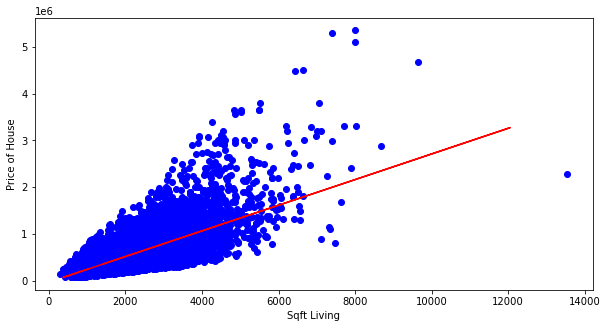

In [15]:
# visualize full dataset
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 5)
ax1.scatter(X_train,y_train,color='blue')
ax1.set_xlabel('Sqft Living')
ax1.set_ylabel('Price of House')
ax1.plot(X_test,regr.predict(X_test),color='red')

In [14]:
#USING MULTIPLE REGRESSION-------------------------------------------------------------------------------

In [16]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
#Selection of features from columns which will be used as the dependent variables to train the Model
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'sqft_living15']]

In [18]:
#Target variable which will be used be our model for prediction
y = house_data['price']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [21]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [22]:
#To find the Coefficents
print('The Coefficients :',regr.coef_)
#To find the intercept
print('Intercept is: ',regr.intercept_)
#To find the Mean-Squared Error
print('Mean squared error: %.8f'%mean_squared_error(y_test, regr.predict(X_test)))

The Coefficients : [-24975.63569531  30934.08907312  71032.54826178   9099.67161464
  54681.63309884  41390.67766926 121325.61529648  62711.87440161
  30069.61233274 -91423.52910549    892.83979195 -17471.36197783
  81994.62282397  15393.34730008]
Intercept is:  539869.9481502358
Mean squared error: 46252750116.64492798


In [23]:
#To find the R2 score A.K.A Accuracy score
y_pred = regr.predict(X_test)
print('Coefficient of determination: %.2f'%r2_score(y_test,y_pred))

Coefficient of determination: 0.68


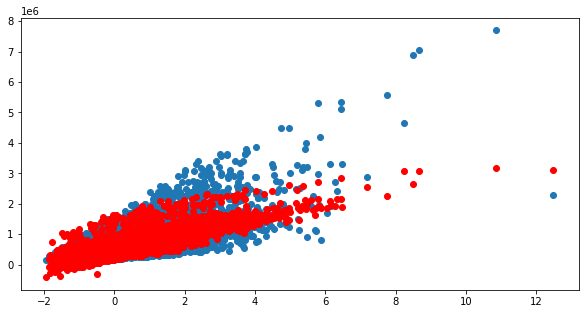

In [22]:
#Plot of the prediction points
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], regr.predict(X),color='red')

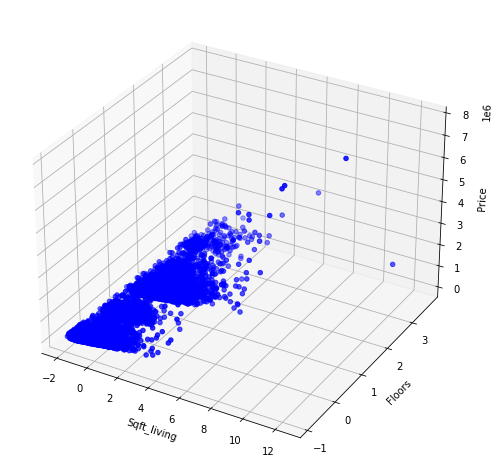

In [24]:
#3d plot for multiple linear regression
fig1 = plt.figure()

ax1 = fig1.add_subplot(111,projection = '3d')
ax1.scatter(X[:,2],X[:,3],y, color = 'blue')

# Plot the plane:
#X1,X2 = np.meshgrid(range(80),range(30))
#Z = regr.coef_[0]*X1 + regr.coef_[1]*X2 + regr.intercept_
#ax1.plot_surface(X1,X2,Z, alpha = 0.5)
#ax1.azim = -30 
'''
ax1.azim = -30 -- To rotate the plot
ax1.dist = 10 -- To zoom
ax1.elev = 20 -- The Elevation
'''

ax1.set_xlabel('Sqft_living')
ax1.set_ylabel('Floors')
ax1.set_zlabel('Price')

fig1.tight_layout(pad=-5.0)